In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pd.set_option('display.max_columns',None)

In [15]:
bank_main_df = pd.read_csv('./Dataset_1_Bank Marketing/bank_marketing.csv',delimiter=';')

bank_main_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no


In [16]:
bank_main_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43872.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.924781,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.610835,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### deposit

no     0.883015
yes    0.116985
Name: deposit, dtype: float64


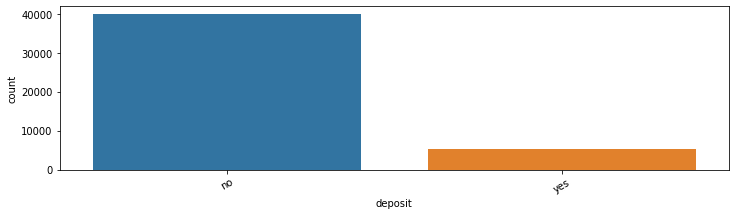

In [150]:
print(bank_main_df['deposit'].value_counts(normalize=True))
plt.figure(figsize=(12,3))
sns.countplot(data=bank_main_df,x='deposit')
plt.xticks(rotation=30);

#### Age

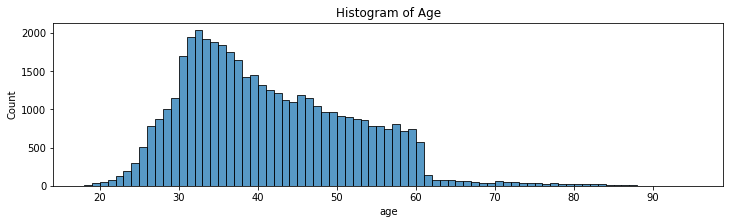

In [125]:
#what's with the gaps?
plt.figure(figsize=(12,3))
sns.histplot(data=bank_main_df,x='age',bins=(95-18))
plt.title("Histogram of Age")
plt.savefig('Images/age_histogram.png');

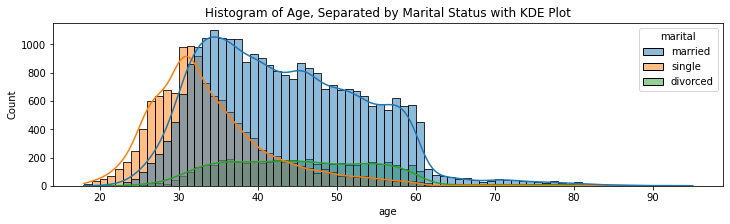

In [126]:
plt.figure(figsize=(12,3))
sns.histplot(data=bank_main_df,x='age',bins=(95-18),hue='marital',kde=True)
plt.title('Histogram of Age, Separated by Marital Status with KDE Plot')
plt.savefig('Images/age_histogram_kde_marital.png');

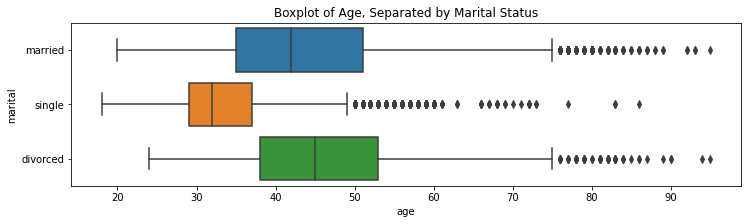

In [127]:
plt.figure(figsize=(12,3))
sns.boxplot(data=bank_main_df,x='age',y='marital')
plt.title('Boxplot of Age, Separated by Marital Status')
plt.savefig('Images/age_boxplot_marital.png');

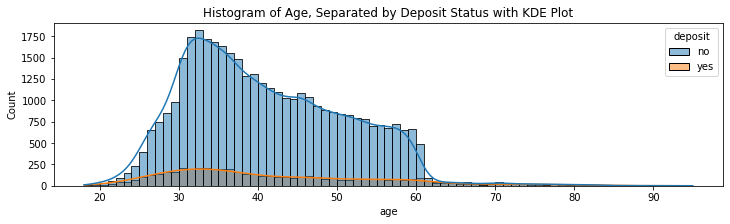

In [128]:
plt.figure(figsize=(12,3))
sns.histplot(data=bank_main_df,x='age',bins=(95-18),hue='deposit',kde=True)
plt.title('Histogram of Age, Separated by Deposit Status with KDE Plot')
plt.savefig('Images/age_histogram_kde_deposit.png');

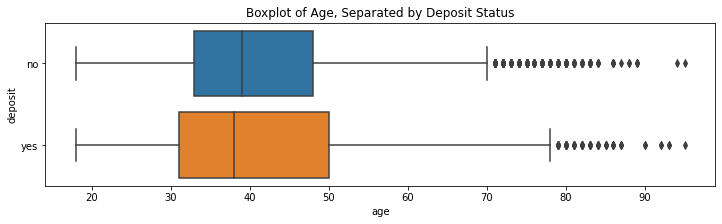

In [129]:
plt.figure(figsize=(12,3))
sns.boxplot(data=bank_main_df,x='age',y='deposit')
plt.title('Boxplot of Age, Separated by Deposit Status')
plt.savefig('Images/age_boxplot_deposit.png');

#### Job

In [130]:
print(bank_main_df['job'].value_counts())
print('\n')
pd.DataFrame(np.round(bank_main_df.groupby('job')['deposit'].value_counts(normalize=True),2)).T

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64




job     admin.       blue-collar       entrepreneur       housemaid        \
deposit     no   yes          no   yes           no   yes        no   yes   
deposit   0.88  0.12        0.93  0.07         0.92  0.08      0.91  0.09   

job     management       retired       self-employed       services        \
deposit         no   yes      no   yes            no   yes       no   yes   
deposit       0.86  0.14    0.77  0.23          0.88  0.12     0.91  0.09   

job     student       technician       unemployed       unknown        
deposit      no   yes         no   yes         no   yes      no   yes  
deposit    0.71  0.29       0.89  0.11       0.84  0.16    0.88  0.12

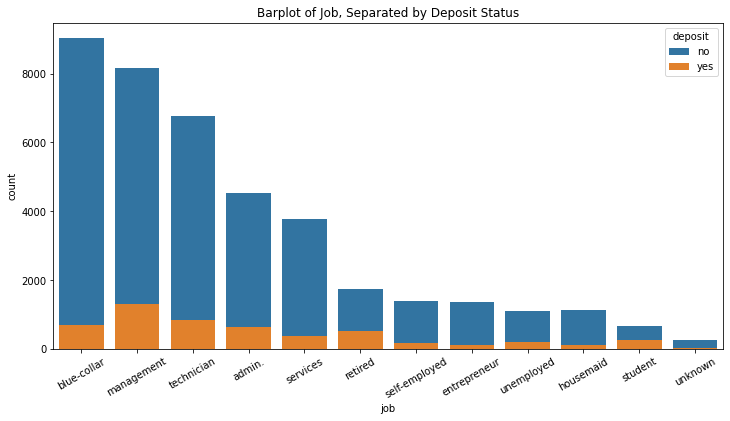

In [248]:
plt.figure(figsize=(12,6))
sns.countplot(data=bank_main_df,x='job',order=bank_main_df['job'].value_counts().index,hue='deposit',dodge=False)
plt.xticks(rotation=30)
plt.title('Barplot of Job, Separated by Deposit Status')
plt.savefig('Images/job_barplot_deposit2.png');

#### Marital

In [162]:
pd.DataFrame(np.round(bank_main_df.groupby('marital')['deposit'].value_counts(normalize=True),2)).T

marital divorced       married      single      
deposit       no   yes      no  yes     no   yes
deposit     0.88  0.12     0.9  0.1   0.85  0.15

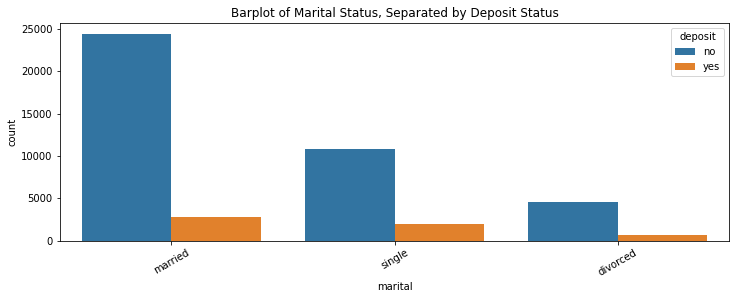

In [165]:
plt.figure(figsize=(12,4))
sns.countplot(data=bank_main_df,x='marital',hue='deposit')
plt.xticks(rotation=30)
plt.title('Barplot of Marital Status, Separated by Deposit Status')
plt.savefig('Images/marital_barplot_deposit.png');

#### Education

In [171]:
pd.DataFrame(np.round(bank_main_df.groupby('education')['deposit'].value_counts(normalize=True),2)).T

education primary       secondary       tertiary       unknown      
deposit        no   yes        no   yes       no   yes      no   yes
deposit      0.91  0.09      0.89  0.11     0.85  0.15    0.86  0.14

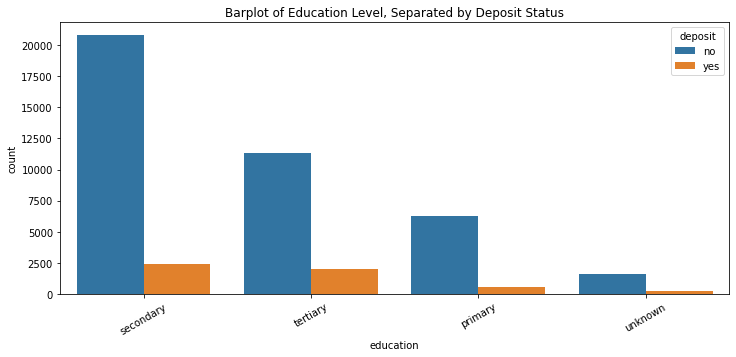

In [175]:
plt.figure(figsize=(12,5))
sns.countplot(data=bank_main_df,x='education',order=bank_main_df['education'].value_counts().index,hue='deposit')
plt.xticks(rotation=30)
plt.title('Barplot of Education Level, Separated by Deposit Status')
plt.savefig('Images/education_barplot_deposit.png');

#### Default

In [181]:
pd.DataFrame(np.round(bank_main_df.groupby('default')['deposit'].value_counts(normalize=True),2)).T

default    no         yes      
deposit    no   yes    no   yes
deposit  0.88  0.12  0.93  0.07

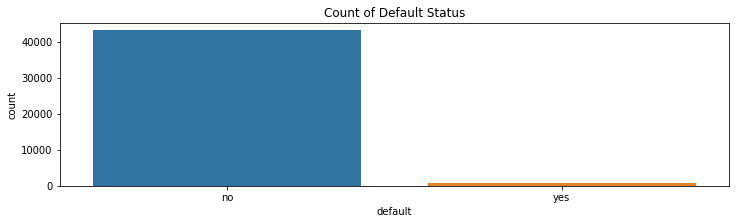

In [184]:
plt.figure(figsize=(12,3))
sns.countplot(data=bank_main_df,x='default')
#plt.xticks(rotation=30)
plt.title('Count of Default Status')
plt.savefig('Images/default_barplot.png');

#### Balance

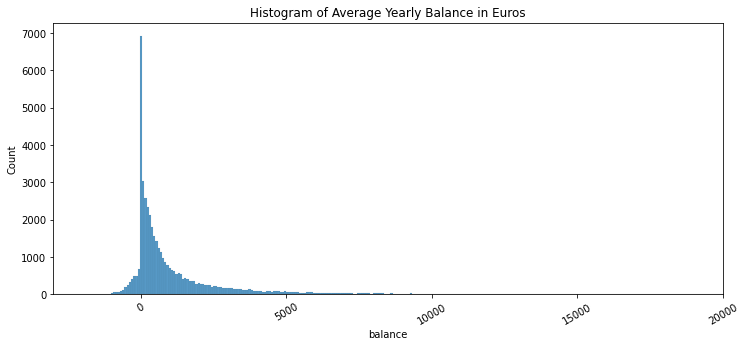

In [203]:
#print(bank_main_df['default'].value_counts())
plt.figure(figsize=(12,5))
sns.histplot(data=bank_main_df,x='balance')
plt.xticks(rotation=30)
plt.xlim(-3000,20000)
plt.title('Histogram of Average Yearly Balance in Euros')
plt.savefig('Images/balance_histogram.png');

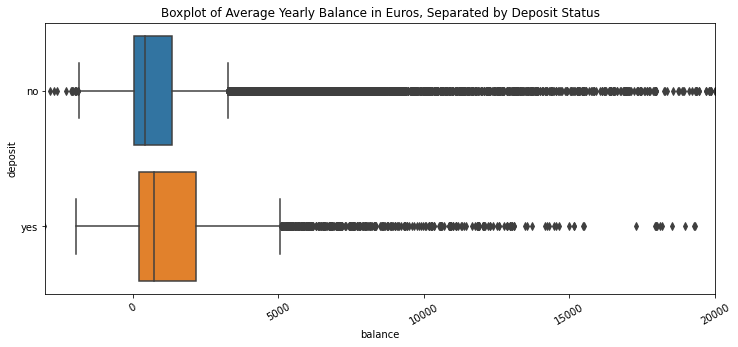

In [206]:
#print(bank_main_df['default'].value_counts())
plt.figure(figsize=(12,5))
sns.boxplot(data=bank_main_df,x='balance',y='deposit')
plt.xticks(rotation=30);
plt.xlim(-3000,20000)
plt.title('Boxplot of Average Yearly Balance in Euros, Separated by Deposit Status')
plt.savefig('Images/balance_boxplot_deposit.png');

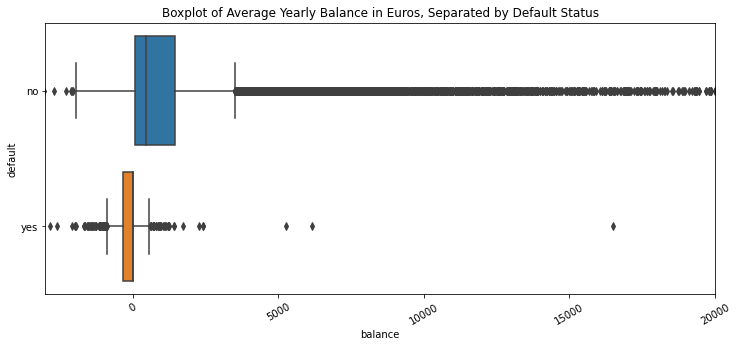

In [208]:
#print(bank_main_df['default'].value_counts())
plt.figure(figsize=(12,5))
sns.boxplot(data=bank_main_df,x='balance',y='default')
plt.xticks(rotation=30);
plt.xlim(-3000,20000)
plt.title('Boxplot of Average Yearly Balance in Euros, Separated by Default Status')
plt.savefig('Images/balance_boxplot_default.png');

#### Housing

In [217]:
pd.DataFrame(np.round(bank_main_df.groupby('housing')['deposit'].value_counts(normalize=True),2)).T

housing    no         yes      
deposit    no   yes    no   yes
deposit  0.83  0.17  0.92  0.08

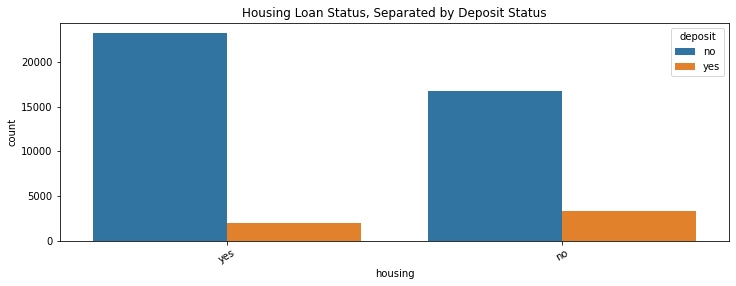

In [221]:
plt.figure(figsize=(12,4))
sns.countplot(data=bank_main_df,x='housing',hue='deposit')
plt.xticks(rotation=30)
plt.title('Housing Loan Status, Separated by Deposit Status')
plt.savefig('Images/housing_barplot_deposit.png');

#### Loan

In [226]:
pd.DataFrame(np.round(bank_main_df.groupby('loan')['deposit'].value_counts(normalize=True),2)).T

loan       no         yes      
deposit    no   yes    no   yes
deposit  0.87  0.13  0.93  0.07

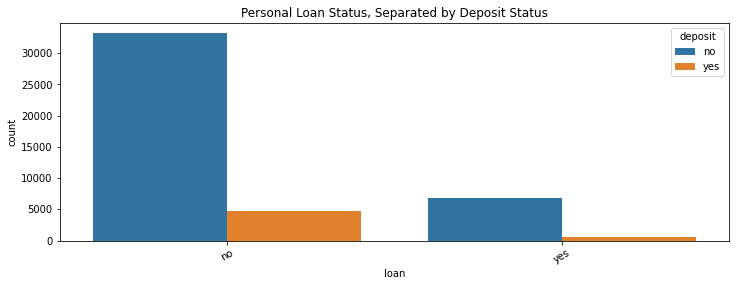

In [229]:
plt.figure(figsize=(12,4))
sns.countplot(data=bank_main_df,x='loan', hue='deposit')
plt.xticks(rotation=30)
plt.title('Personal Loan Status, Separated by Deposit Status')
plt.savefig('Images/loan_barplot_deposit.png');

#### Contact

In [232]:
pd.DataFrame(np.round(bank_main_df.groupby('contact')['deposit'].value_counts(normalize=True),2)).T

contact cellular       telephone       unknown      
deposit       no   yes        no   yes      no   yes
deposit     0.85  0.15      0.87  0.13    0.96  0.04

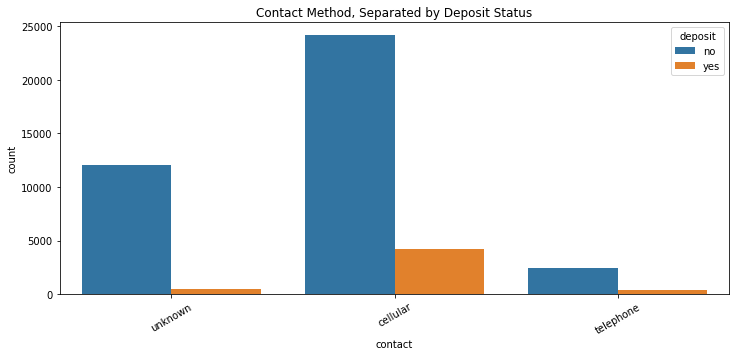

In [236]:
plt.figure(figsize=(12,5))
sns.countplot(data=bank_main_df,x='contact',hue='deposit')
plt.xticks(rotation=30)
plt.title('Contact Method, Separated by Deposit Status')
plt.savefig('Images/contact_barplot_deposit.png');

#### Day

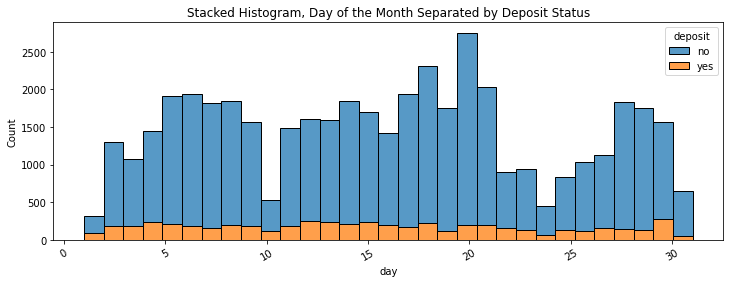

In [242]:
#print(bank_main_df['day'].value_counts())
plt.figure(figsize=(12,4))
sns.histplot(data=bank_main_df,x='day',hue='deposit',multiple='stack',bins=31)
plt.xticks(rotation=30)
plt.title('Stacked Histogram, Day of the Month Separated by Deposit Status')
plt.savefig('Images/day_histogram_stacked_deposit.png');

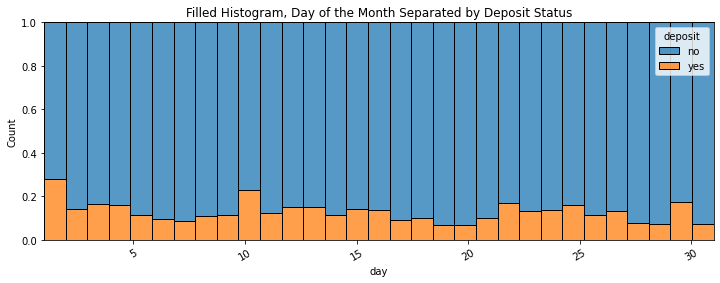

In [243]:
#print(bank_main_df['day'].value_counts())
plt.figure(figsize=(12,4))
sns.histplot(data=bank_main_df,x='day',hue='deposit',multiple='fill',bins=31)
plt.xticks(rotation=30)
plt.title('Filled Histogram, Day of the Month Separated by Deposit Status')
plt.savefig('Images/day_histogram_filled_deposit.png');

In [141]:
bank_main_df.groupby('day')['deposit'].value_counts(normalize=True)

day  deposit
1    no         0.720497
     yes        0.279503
2    no         0.859242
     yes        0.140758
3    no         0.835032
                  ...   
29   yes        0.073926
30   no         0.826948
     yes        0.173052
31   no         0.928460
     yes        0.071540
Name: deposit, Length: 62, dtype: float64

#### Month

In [256]:
pd.DataFrame(np.round(bank_main_df.groupby('month')['deposit'].value_counts(normalize=True),2)).T

month    apr        aug         dec         feb        jan        jul        \
deposit   no  yes    no   yes    no   yes    no   yes   no  yes    no   yes   
deposit  0.8  0.2  0.89  0.11  0.53  0.47  0.83  0.17  0.9  0.1  0.91  0.09   

month    jun        mar         may        nov        oct         sep        
deposit   no  yes   yes    no    no   yes   no  yes    no   yes    no   yes  
deposit  0.9  0.1  0.52  0.48  0.93  0.07  0.9  0.1  0.56  0.44  0.54  0.46

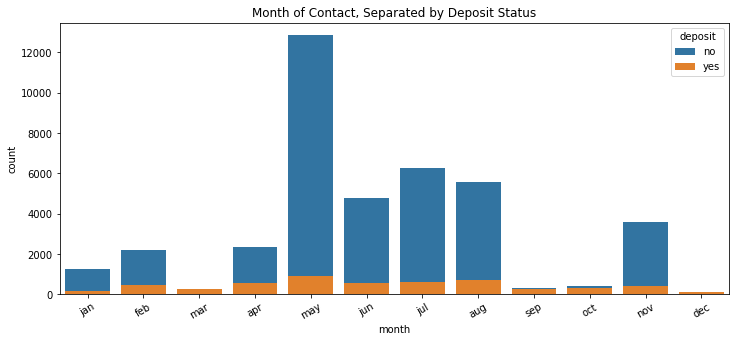

In [260]:
month_list=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
plt.figure(figsize=(12,5))
sns.countplot(data=bank_main_df,x='month',order=month_list,hue='deposit',dodge=False)
plt.xticks(rotation=30)
plt.title('Month of Contact, Separated by Deposit Status')
plt.savefig('Images/month_barplot_deposit.png');

#### Duration

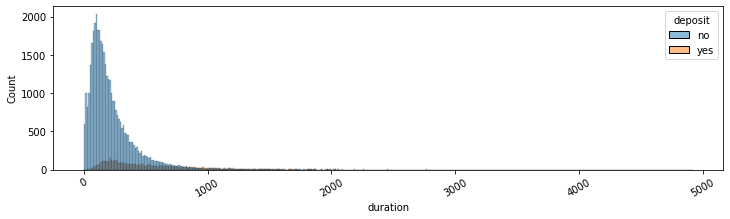

In [143]:
#print(bank_main_df['day'].value_counts())
plt.figure(figsize=(12,3))
sns.histplot(data=bank_main_df,x='duration',hue='deposit',pmax=.5)
plt.xticks(rotation=30);

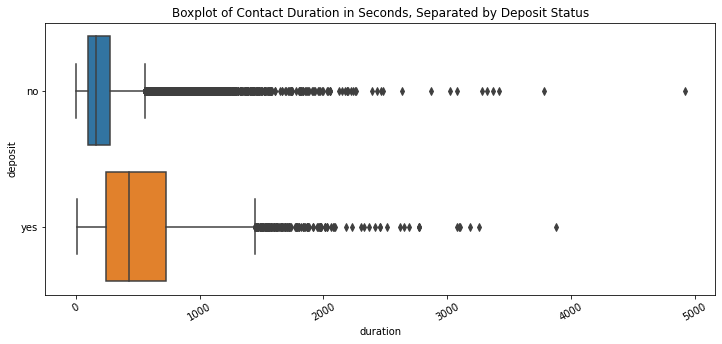

In [264]:
#print(bank_main_df['day'].value_counts())
plt.figure(figsize=(12,5))
sns.boxplot(data=bank_main_df,x='duration',y='deposit')
plt.xticks(rotation=30)
plt.title('Boxplot of Contact Duration in Seconds, Separated by Deposit Status')
plt.savefig('Images/duration_boxplot_deposit.png');

#### Campaign

In [275]:
pd.DataFrame(np.round(bank_main_df.groupby('campaign')['deposit'].value_counts(normalize=True),2)).T

campaign    1           2           3           4           5           6   \
deposit     no   yes    no   yes    no   yes    no   yes    no   yes    no   
deposit   0.85  0.15  0.89  0.11  0.89  0.11  0.91  0.09  0.92  0.08  0.93   

campaign          7           8           9           10          11        \
deposit    yes    no   yes    no   yes    no   yes    no   yes    no   yes   
deposit   0.07  0.94  0.06  0.94  0.06  0.94  0.06  0.95  0.05  0.92  0.08   

campaign    12          13          14          15          16          17  \
deposit     no   yes    no   yes    no   yes    no   yes    no   yes    no   
deposit   0.97  0.03  0.95  0.05  0.96  0.04  0.95  0.05  0.97  0.03  0.91   

campaign         18   19    20          21         22   23    24         25  \
deposit    yes   no   no    no   yes    no   yes   no   no    no   yes   no   
deposit   0.09  1.0  1.0  0.98  0.02  0.97  0.03  1.0  1.0  0.95  0.05  1.0   

campaign   26   27   28    29         30   31    32         33   34   35   36  \
deposit    no   no   no    no   yes   no   no    no   yes   no   no   no   no   
deposit   1.0  1.0  1.0  0.94  0.06  1.0  1.0  0.89  0.11  1.0  1.0  1.0  1.0   

campaign   37   38   39   41   43   44   46   50   51   55   58   63  
deposit    no   no   no   no   no   no   no   no   no   no   no   no  
deposit   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

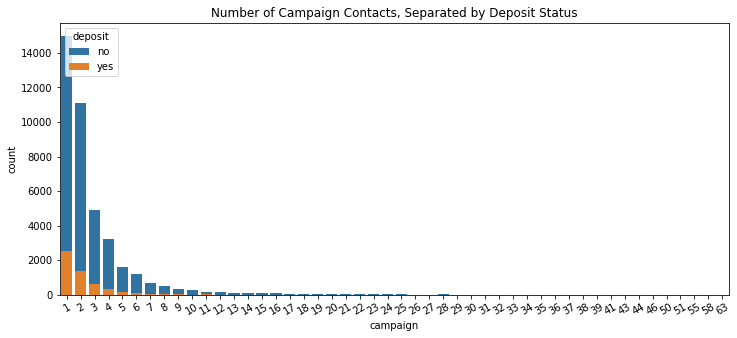

In [278]:
plt.figure(figsize=(12,5))
sns.countplot(data=bank_main_df,x='campaign', hue='deposit',dodge=False)
plt.xticks(rotation=30)
plt.title('Number of Campaign Contacts, Separated by Deposit Status')
plt.savefig('Images/campaign_barplot_deposit.png');

#### pdays

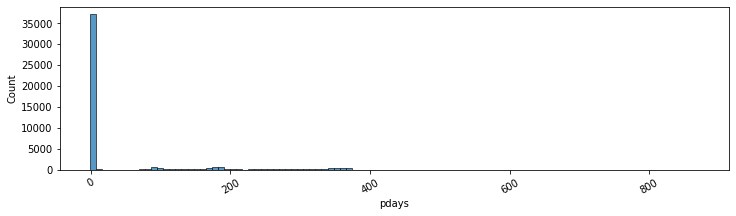

In [241]:
#print(bank_main_df['pdays'].value_counts())
plt.figure(figsize=(12,3))
sns.histplot(data=bank_main_df,x='pdays',bins=100)
plt.xticks(rotation=30);

#### previous

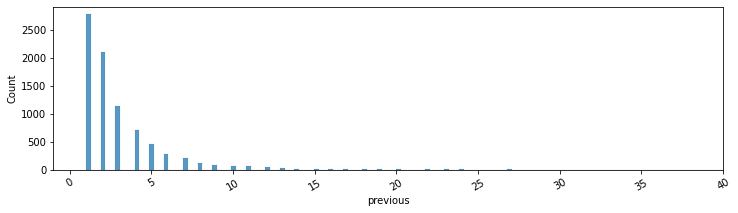

In [147]:
#print(bank_main_df['pdays'].value_counts())
plt.figure(figsize=(12,3))
sns.histplot(data=bank_main_df[bank_main_df['previous'] > 0],x='previous')
plt.xticks(rotation=30)
plt.xlim(-1,40);

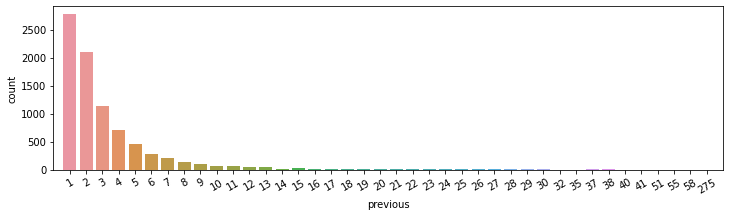

In [148]:
#print(bank_main_df['pdays'].value_counts())
plt.figure(figsize=(12,3))
sns.countplot(data=bank_main_df[bank_main_df['previous'] > 0],x='previous')
plt.xticks(rotation=30)
plt.xlim(-1,40);

#### poutcome

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


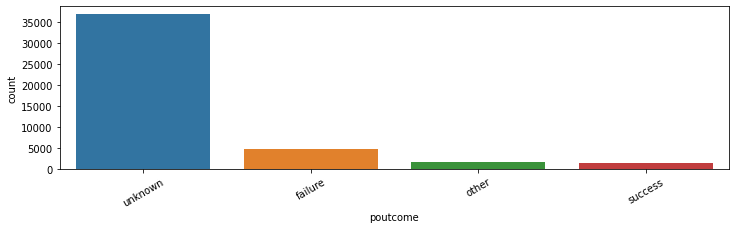

In [149]:
print(bank_main_df['poutcome'].value_counts())
plt.figure(figsize=(12,3))
sns.countplot(data=bank_main_df,x='poutcome')
plt.xticks(rotation=30);

In [151]:
bank_main_df['deposit'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: deposit, dtype: float64

### Creating fields to replace *pdays* and *previous*

In [281]:
bank_main_df['prior_contact'] = [ 0 if bank_main_df['pdays'][i] == -1 else 1 for i in range(len(bank_main_df))]
bank_main_df['prior_contact2'] = [ 0 if bank_main_df['previous'][i] == 0 else 1 for i in range(len(bank_main_df))]

Notice that if we separate "never contacted" from "contacted at least once" the numbers are identical for both pdays and previous, as should be expected.

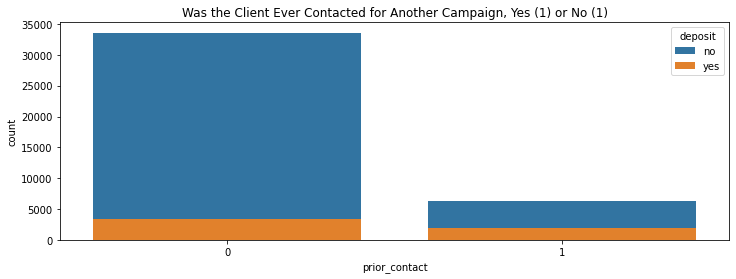

In [293]:
plt.figure(figsize=(12,4))
sns.countplot(data=bank_main_df,hue='deposit',x='prior_contact',dodge=False)
plt.title('Was the Client Ever Contacted for Another Campaign, Yes (1) or No (1)')
plt.savefig('Images/prior_contact_yesno.png')

In [284]:
bank_main_df.groupby('deposit')['prior_contact'].value_counts()#normalize=True)

deposit  prior_contact
no       0                33570
         1                 6352
yes      0                 3384
         1                 1905
Name: prior_contact, dtype: int64

<AxesSubplot:xlabel='deposit', ylabel='count'>

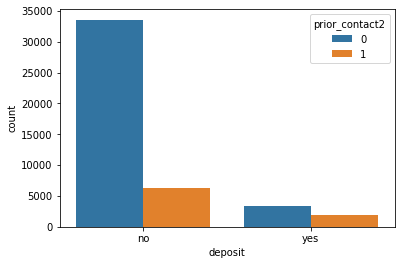

In [285]:
sns.countplot(data=bank_main_df,x='deposit',hue='prior_contact2')

In [288]:
bank_main_df.groupby('deposit')['prior_contact2'].value_counts()#normalize=True)

deposit  prior_contact2
no       0                 33570
         1                  6352
yes      0                  3384
         1                  1905
Name: prior_contact2, dtype: int64